<a href="https://colab.research.google.com/github/dongarerohan/Treue_Technology-task3-Bank-Customer-Churn-Prediction/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Check null values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Overall statistics of dataset

In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Drop Irrelevant features

In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Handling unbalanced data

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE

<Axes: ylabel='count'>

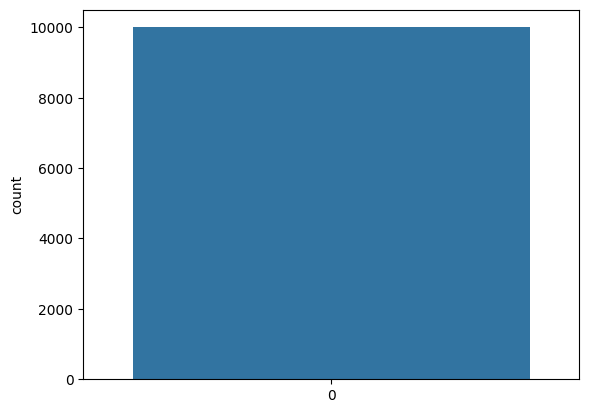

In [ ]:
sns.countplot(df['Exited'])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,Y_res= SMOTE().fit_resample(X,Y)

In [ ]:
Y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Splitting the dataset into training and testing

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.30,random_state=30)

### Feature scaling

In [ ]:
rd = StandardScaler()

In [ ]:
X_train=rd.fit_transform(X_train)
X_test=rd.transform(X_test)

In [ ]:
X_train

array([[-1.87056366,  1.60864863,  1.54121616, ..., -0.57707406,
        -0.4620106 , -0.82965263],
       [-0.51179504, -0.79325526,  1.54121616, ...,  1.73287984,
        -0.4620106 , -0.82965263],
       [ 1.85789742, -0.69317593,  1.90698964, ..., -0.57707406,
         2.16445251,  1.20532372],
       ...,
       [ 1.84702727,  1.70872796, -1.38497169, ...,  1.73287984,
        -0.4620106 ,  1.20532372],
       [ 1.096987  , -0.19277929,  0.8096692 , ..., -0.57707406,
         2.16445251, -0.82965263],
       [ 0.61870044, -0.19277929,  1.17544268, ...,  1.73287984,
        -0.4620106 , -0.82965263]])

# Gradient boosting classifier

In [ ]:
rsd = GradientBoostingClassifier()

In [ ]:
rsd.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_pred1=rsd.predict(X_test)

In [ ]:
print('Accuracy Score is' ,accuracy_score(Y_test,y_pred1))
print('Precision Score is' ,precision_score(Y_test,y_pred1))
print('recall Score is' ,recall_score(Y_test,y_pred1))

Accuracy Score is 0.8342402678945166
Precision Score is 0.8385460693153001
recall Score is 0.8287385129490392


# Random forest classifier

In [ ]:
sd = RandomForestClassifier()

In [ ]:
sd.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred2=sd.predict(X_test)

In [ ]:
print('Accuracy Score is' ,accuracy_score(Y_test,y_pred2))
print('Precision Score is' ,precision_score(Y_test,y_pred2))
print('Recall Score is' ,recall_score(Y_test,y_pred2))

Accuracy Score is 0.8467978233570531
Precision Score is 0.8456738768718802
Recall Score is 0.8492063492063492


# Decision tree classifier

In [ ]:
ps = DecisionTreeClassifier()

In [ ]:
ps.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 =ps.predict(X_test)

In [ ]:
print('Accuracy Score is' ,accuracy_score(Y_test,y_pred3))
print('Precision Score is' ,precision_score(Y_test,y_pred3))
print('recall Score is' ,recall_score(Y_test,y_pred3))

Accuracy Score is 0.7869401423189619
Precision Score is 0.7752
recall Score is 0.8095238095238095


#Logistic regression

In [ ]:
ysm = LogisticRegression()

In [ ]:
ysm.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred4 =ysm.predict(X_test)

In [ ]:
print('Accuracy Score is' ,accuracy_score(Y_test,y_pred4))
print('Precision Score is' ,precision_score(Y_test,y_pred4))
print('recall Score is' ,recall_score(Y_test,y_pred4))

Accuracy Score is 0.7808706571787358
Precision Score is 0.7768187422934648
recall Score is 0.7894736842105263


## KNeighbors classifier

In [ ]:
sss = KNeighborsClassifier()

In [ ]:
sss.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred5 =sss.predict(X_test)

In [ ]:
print('Accuracy Score is' ,accuracy_score(Y_test,y_pred5))
print('Precision Score is' ,precision_score(Y_test,y_pred5))
print('recall Score is' ,recall_score(Y_test,y_pred5))

Accuracy Score is 0.8118459606529929
Precision Score is 0.8054760931753168
recall Score is 0.8233082706766918


In [ ]:
final = pd.DataFrame({'Models' :['GBC','RF','DT','LR','KNN'],
                      'ACC':[accuracy_score(Y_test,y_pred1),
                            accuracy_score(Y_test,y_pred2),
                              accuracy_score(Y_test,y_pred3),
                              accuracy_score(Y_test,y_pred4),
                              accuracy_score(Y_test,y_pred5)]})

In [ ]:
final

,Models,ACC
0,GBC,0.834240
1,RF,0.846798
2,DT,0.786940
3,LR,0.780871
4,KNN,0.811846


<Axes: xlabel='Models', ylabel='ACC'>

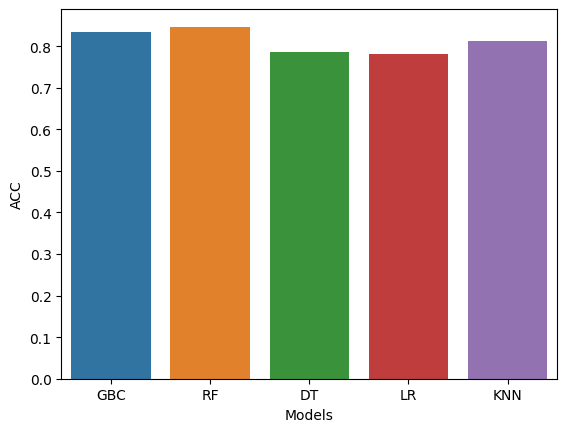

In [ ]:
sns.barplot(x=final['Models'],y=final['ACC'])

In [ ]:
final1 = pd.DataFrame({'Models' :['GBC','RF','DT','LR','KNN'],
                      'PRE':[accuracy_score(Y_test,y_pred1),
                            accuracy_score(Y_test,y_pred2),
                              accuracy_score(Y_test,y_pred3),
                              accuracy_score(Y_test,y_pred4),
                              accuracy_score(Y_test,y_pred5)]})

In [ ]:
final1

,Models,PRE
0,GBC,0.834240
1,RF,0.846798
2,DT,0.786940
3,LR,0.780871
4,KNN,0.811846


<Axes: xlabel='Models', ylabel='PRE'>

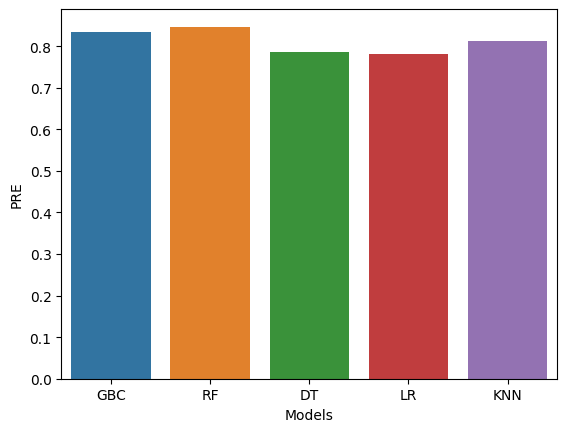

In [ ]:
sns.barplot(x=final1['Models'],y=final1['PRE'])